<a href="https://colab.research.google.com/github/MinyoungHer/-projects-/blob/main/Fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 이상치 탐색 모델 프로젝트
* 약 28만건의 신용카드 거래 데이터 중에서 이상거래(Fraud)를 감지해내는 프로그램

## 0.Data loading
* 신용카드 거래내역 데이터를 구글 드라이브에 저장하고 불러온다.

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


이를 data라는 변수로 저장하였다.

In [96]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/creditcard (1).csv')

## 1.EDA(Exploaratory Data Analysis)

* 가볍게 데이터를 살펴보았다. 총 31개의 변수가 있는 것을 확인할 수 있었다.
* 대부분의 변수들은 주성분 분석이 된 형태였고, class라는 변수가 이상치거래와 정상거래를 구분하는 범주형 변수이다.
* 이 범주형 변수를 종속변수로 사용하여 로지스틱 회귀 모델링을 시도해야겠다.
* 각 거래가 정상거래인지, 이상거래인지 분류, 예측을 위한 모델이다.

In [97]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* 이외에도 총 284807개의 관측치들이 존재하였고, 각 변수별로 결측치 또한 존재하지 않았다.

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* 데이터의 기본적인 정보를 파악하기 위해 다음의 코드를 실행했으나, 대부분의 변수들이 주성분 분석을 통해 변환이 되었고, 따라서 숫자들이 무엇을 의미하는지 이해할 수가 없었다. 따라서 큰 의미는 없었다.

In [99]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [100]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* 앞서 살펴보았던 것처럼 데이터에 결측치는 존재하지 않았다. 이 데이터를 그냥 사용해도 좋을 것 같다.

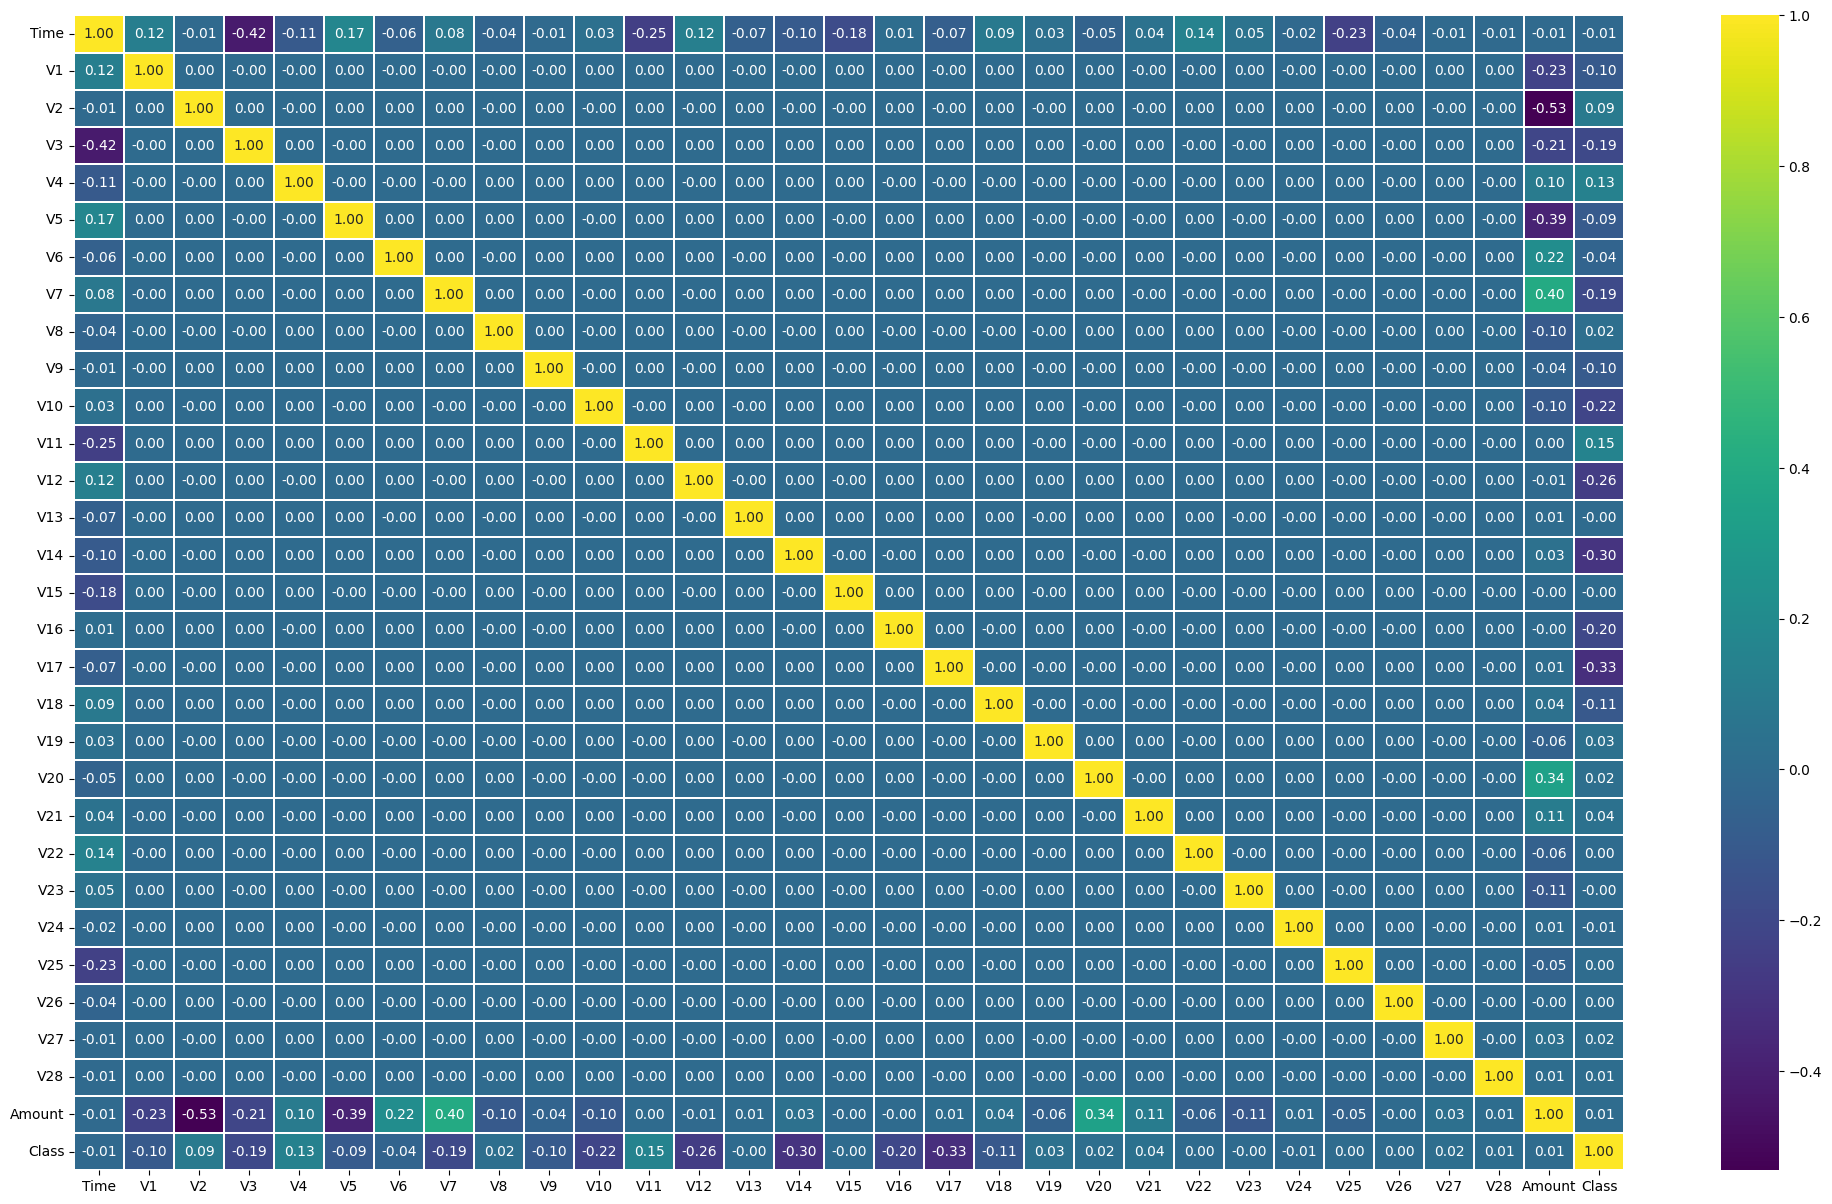

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(25,15))
sns.heatmap(data.corr(), annot=True, linewidths=0.3, fmt='0.2f', ax=ax, cmap='viridis')
plt.show()

* 주성분 분석의 변수들이니 변수들 사이에 상관관계가 높은 경우는 없었다. 따라서 회귀식에서 다중공선성의 문제 또한 걱정하지 않아도 될 듯 하다.

* 다음은 가볍게 이상거래와 정상거래의 빈도수를 비교하기 위한 시각화 과정이다.

In [102]:
num_cases=data['Class'].value_counts()

In [103]:
labels=num_cases.index

In [104]:
num_cases.index

Int64Index([0, 1], dtype='int64')

In [105]:
num_cases

0    284315
1       492
Name: Class, dtype: int64

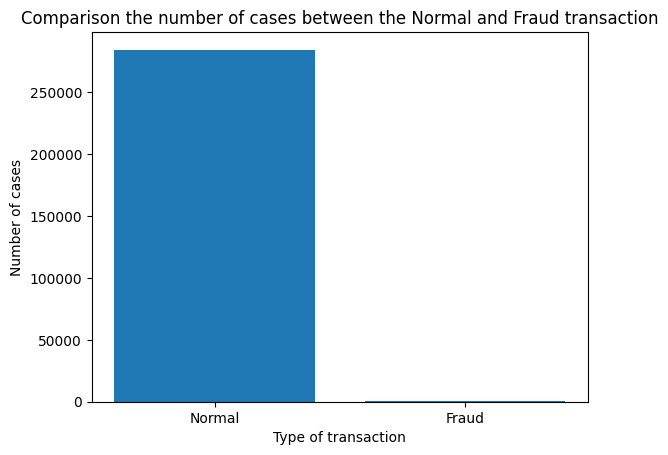

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

num_cases = data['Class'].value_counts()
labels = ['Normal', 'Fraud']

plt.bar(labels, num_cases)
plt.xlabel('Type of transaction')
plt.ylabel('Number of cases')
plt.title('Comparison the number of cases between the Normal and Fraud transaction')
plt.show()

* 시각화를 해보니, 우선 정상 거래와 이상 거래의 데이터의 수에서 현저한 차이를 보이며 데이터 불균형의 문제가 있는 것을 확인할 수 있다.


* 추가적으로 변수 time은 모델링에 상관없는 변수이므로 삭제를 한 데이터를 다시 data로 저장해준다.

In [107]:
# Time 변수 삭제
data=data.iloc[:,1:31]
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


* time 변수가 사라졌다.

## 2.Data Preprocessing
* 이제 분석을 용이하게 하기 위해 데이터 전처리 과정을 시도한다.

* 설명변수와 종속변수 각각을 x_data, y_data로 나누어준다.

In [108]:
x_data=data.iloc[:,0:29]
y_data=data.iloc[:,29:30]

x_data=np.array(x_data, dtype=np.float32)
y_data=np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


* 우리의 데이터 중 amount변수는 단위가 나머지 변수들과 다르므로, 모든 변수들의 데이터 단위를 동일하게 맞춰주는 scaling과정을 거친다.

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled_data=scaler.fit_transform(x_data)

## 3.Logistic Regression Model

* 일단 첫 번째로 시도할 수 있는 방법은 가장 간단한 모델인 로지스틱 회귀 모형을 세워보는 것이다.


### 3.1 Parmater Initialization

In [110]:
import tensorflow as tf
tf.random.set_seed(22)
W=tf.Variable(tf.random.normal([29,1], mean=0.0))
b=tf.Variable(tf.random.normal([1], mean=0.0))


* W: 앞에는 input dimension, 뒤에는 output dimension으로 설정해야 한다.
* b: output dimension과 동일하게 설정한다.

In [111]:
print(W.dtype)
print(x_scaled_data.dtype)

<dtype: 'float32'>
float32


### 3.2 Hypothesis Define

In [112]:
def hypothesis(x):
  z=tf.matmul(x,W)+b
  sigmoid=1/(1+tf.exp(-z))
  return sigmoid

* Feature와 Label사이의 관계를 정의해주는 부분이다.
* 여기서는 이진분류 문제에 주로 사용되는 logistic regression을 hypothesis로 설정해주었다.

### 3.3 Cost Function Define

In [113]:
def cost_function(H,Y):
  cost=-tf.reduce_mean(Y*tf.math.log(H)+(1-Y)*tf.math.log(1-H))
  return cost

* Cost function을 이진 분류에서 주로 사용되는 Cross entropy로 설정하였다.

### 3.4 Metric Define

In [114]:
def accuracy(hypo, label):
  predicted=tf.cast(hypo>0.5, dtype=tf.float32)
  accuracyd=tf.reduce_mean(tf.cast(tf.equal(predicted, label), dtype=tf.float32))
  return accuracyd

* 실제 모델의 퍼포먼스를 측정하는 기준을 설정한다. 일반적으로 가장 많이 쓰이는 Accuracy를 우선 설정해준다.

### 3.5 Hyper-parameter setting
* 학습을 진행하기 위해 학습률과 optimizer를 정의해준다.

In [115]:
learning_rate=0.0001
optimizer=tf.optimizers.SGD(learning_rate)

### 3.6 Training

이제 모델을 학습시켜 손실을 최소화 시켜주는 weight와 bias를 찾으므로써 최적의 함수를 찾아준다.

In [116]:
for step in range(2022):
  with tf.GradientTape() as g:
    pred=hypothesis(x_scaled_data)
    cost=cost_function(pred,y_data)

    gradients=g.gradient(cost, [W,b])
    optimizer.apply_gradients(zip(gradients, [W,b]))

    if step % 200 ==0:
      print(f"step: {step}, loss: {cost.numpy()}")

w_hat=W.numpy()
b_hat=b.numpy()


step: 0, loss: 0.015813225880265236
step: 200, loss: 0.01580575853586197
step: 400, loss: 0.015798309817910194
step: 600, loss: 0.015790868550539017
step: 800, loss: 0.015783440321683884
step: 1000, loss: 0.015776025131344795
step: 1200, loss: 0.015768621116876602
step: 1400, loss: 0.015761228278279305
step: 1600, loss: 0.0157538540661335
step: 1800, loss: 0.015746500343084335
step: 2000, loss: 0.015739159658551216


### 3.7 Performance


In [117]:
acc=accuracy(hypothesis(x_scaled_data), y_data).numpy()
print(f"Accuracy:{acc}")

Accuracy:0.9982725381851196


* 99.8%로 높은 Accuracy를 보인다. 그러나 이 모델은 학습을 하는데 imbalance한 데이터를 사용했으므로, 적절한 평가기준이 될 수 없다.
* 그러므로 Precision과 Recall의 측면에서 모델을 다시 한번 평가해본다.

### 3.8 Precision, recall, F1 score

In [118]:
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [119]:
predicted_x=tf.cast(hypothesis(x_scaled_data)>0.5, dtype=tf.float32)


In [120]:
print("Accuracy=", accuracy_score(predicted_x, y_data))
print("Report=\n", classification_report(predicted_x, y_data))

Accuracy= 0.9982725143693799


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Report=
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284807
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* 대안적인 평가기준에서 살펴보았을 때는 정상거래를 정상거래로 잘 판단하였지만, 이상 거래에 대해서는 전혀 잡지 못하는 것을 확인할 수 있다.
* 따라서 새로운 구조의 모델링을 시도하는 것이 필요해 보인다.

## 4.ANN model


* 먼저 기본적인 인공신경망 모델링을 통해 예측을 시도해보려고 한다.

* 그 전에 먼저 데이터들을 초기화하여 준다.

In [121]:
x_data=data.iloc[:,0:29]
y_data=data.iloc[:,29:30]


print(x_data.shape, y_data.shape)

(284807, 29) (284807, 1)


In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled_data=scaler.fit_transform(x_data)

### 4.1 Data split
* 모델 학습과 평가를 위해 데이터들을 training data와 test data로 나누는 작업을 실시한다.

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled_data, y_data, test_size=0.2,random_state=42 )
print("Train set shape", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Train set shape (227845, 29) (227845, 1)
Test set shape: (56962, 29) (56962, 1)


* Training data를 다시 validation data로 나누어준다.

In [124]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_validation.shape, y_validation.shape)

(182276, 29) (182276, 1)
(45569, 29) (45569, 1)


### 4.2 Model training (ANN)

* 훈련데이터를 사용하여 딥러닝 모델을 학습시켰다.
* input layer, hidden layer, output layer로 총 5개의 층을 구성했다.
* optimizer는 adam을 사용했고, loss function 또한 binary cross-entropy를 사용하였다.
* batch size를 64로 하여 모델을 학습을 시도하였다.

In [125]:
import tensorflow as tf
from tensorflow import keras
import time
from keras import optimizers, metrics, callbacks
start_time=time.time()

model=keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_validation, y_validation))

loss, accuracy=model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)\

end_time=time.time()
training_time=end_time - start_time
minutes=int(training_time//60)
seconds=int(training_time % 60)
print(f"Training time: {minutes} m, {seconds} s")

Epoch 1/10
2849/2849 [==============================] - 43s 12ms/step - loss: 0.5681 - accuracy: 0.7311 - val_loss: 0.2748 - val_accuracy: 0.9986
Epoch 2/10
2849/2849 [==============================] - 33s 11ms/step - loss: 0.1520 - accuracy: 0.9831 - val_loss: 0.0491 - val_accuracy: 0.9986
Epoch 3/10
2849/2849 [==============================] - 32s 11ms/step - loss: 0.0389 - accuracy: 0.9979 - val_loss: 0.0141 - val_accuracy: 0.9986
Epoch 4/10
2849/2849 [==============================] - 32s 11ms/step - loss: 0.0186 - accuracy: 0.9982 - val_loss: 0.0097 - val_accuracy: 0.9986
Epoch 5/10
2849/2849 [==============================] - 32s 11ms/step - loss: 0.0142 - accuracy: 0.9982 - val_loss: 0.0086 - val_accuracy: 0.9986
Epoch 6/10
2849/2849 [==============================] - 33s 12ms/step - loss: 0.0128 - accuracy: 0.9982 - val_loss: 0.0077 - val_accuracy: 0.9986
Epoch 7/10
2849/2849 [==============================] - 32s 11ms/step - loss: 0.0114 - accuracy: 0.9982 - val_loss: 0.0071 -

* 모델의 test accuracy는 약 98%로 높게 나타난 것을 확인할 수 있다.


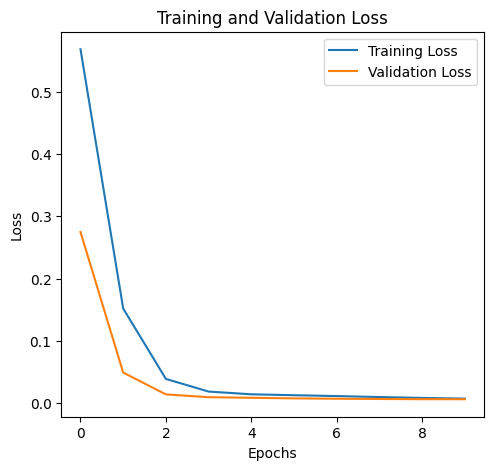

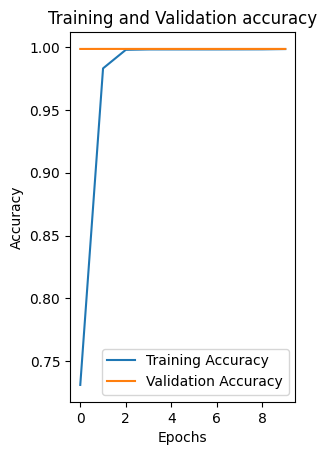

In [126]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

### 4.3 Precision, recall, f1 score
* 다음은 우리의 모델의 평가기준인 precision, recall, f1score를 계산해보도록 하겠다.

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
ANN_prob=model.predict(x_test)
ANN_pred=np.where(ANN_prob>0.5,1,0)
cm=confusion_matrix(y_test, ANN_pred)
report=classification_report(y_test, ANN_pred)
print(report)
print("Confusion matrix:")
print(cm)

1781/1781 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Confusion matrix:
[[56864     0]
 [   98     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* ANN 구조를 사용하였더니 precision과 recall이 모두 꽤 높은 수치가 나왔다는 것을 확인할 수 있었다.
* precision은 84퍼센트가 나왔으며 이는 전체 이상거래라고 판단한 것 중 84퍼센트는 실제로 이상거래였다는 것을 의미한다.
* 반면 recall은 79퍼센트가 나왔는데 이는 실제 이상거래 중 이상거래로 판단한 것의 비율이 79퍼센트였다는 것을 의미한다.
* f1 스코어는 이 둘의 가중치로써 전체적인 모델의 성능을 평가할 수 있다. 이는 81퍼센트가 나왔다.

## 5.Lasso
* 라쏘 회귀를 변수선택 절차에 적용시켜 데이터의 변수를 줄이는 과정과 인공신경망에서의 정규화 과정을 시도해보았다.


###5.1 Lasso(변수선택)

* 다음은 lasso regression을 통해 데이터의 변수들을 줄여보는 시도를 해보았다.

* 먼저 앞의 과정과 동일하게 종속변수와 독립변수로 분리를 해준 상태에서 x데이터만 스케일링을 해주었다.

In [128]:
x_data=data.iloc[:,0:29]
y_data=data.iloc[:,29:30]


print(x_data.shape, y_data.shape)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled_data=scaler.fit_transform(x_data)
from imblearn.over_sampling import RandomOverSampler

(284807, 29) (284807, 1)


In [129]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
lasso_cv=LassoCV(cv=5)
lasso_cv.fit(x_scaled_data,y_data)
lambda_min=lasso_cv.alpha_

selected_indices=list(np.where(lasso_cv.coef_ !=0)[0])
x_selected=x_scaled_data[:, selected_indices]
print(f"선택된 변수들의 인덱스: {selected_indices}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


선택된 변수들의 인덱스: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 15, 16, 17, 18, 23]


* 교차검증법을 통해 최적의 람다 값을 구했으며, 이 람다값을 이용해 라쏘회귀를 적용해보았다.
* 전체 변수 중 회귀계수가 0이 아닌 변수들은 위의 선택된 변수들이다.

In [130]:
x_selected.shape

(284807, 17)

* 독립변수의 shape을 확인해보니 변수가 29개에서 17개로 축소된 것을 확인해 볼 수 있었다.

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_selected, y_data, test_size=0.2,random_state=42 )
print("Train set shape", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Train set shape (227845, 17) (227845, 1)
Test set shape: (56962, 17) (56962, 1)


* 이를 다시 train dataset과 test dataset으로 분리하였다.

In [132]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_validation.shape, y_validation.shape)

(182276, 17) (182276, 1)
(45569, 17) (45569, 1)


In [133]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers, metrics, callbacks
import time
start_time=time.time()

model1=keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(64, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history=model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_validation, y_validation))

loss, accuracy=model1.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

end_time=time.time()
training_time=end_time - start_time

minutes=int(training_time//60)
seconds=int(training_time % 60)
print(f"Training time: {minutes} m, {seconds} s")

Epoch 1/10
2849/2849 [==============================] - 20s 6ms/step - loss: 0.0282 - accuracy: 0.9982 - val_loss: 0.0062 - val_accuracy: 0.9988
Epoch 2/10
2849/2849 [==============================] - 16s 5ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 3/10
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 4/10
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/10
2849/2849 [==============================] - 28s 10ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 6/10
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 7/10
2849/2849 [==============================] - 17s 6ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0025 - val_a

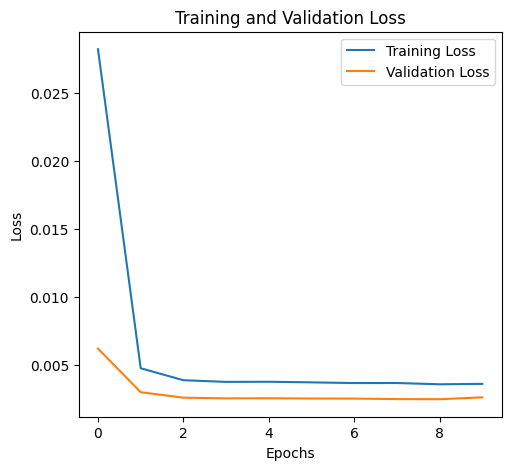

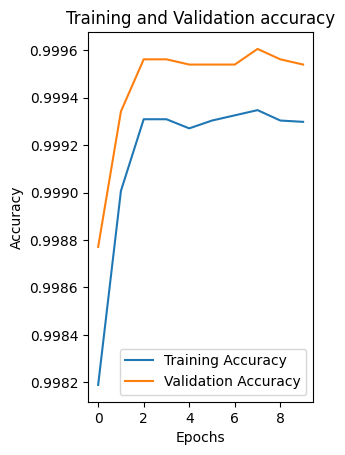

In [134]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

In [135]:
from sklearn.metrics import confusion_matrix, classification_report


x_scale_selected=x_scaled_data[:,selected_indices]
L1_select_prob=model1.predict(x_test)
L1_select_pred=np.where(L1_select_prob>0.5,1,0)
cm=confusion_matrix(y_test, L1_select_pred)
report=classification_report(y_test, L1_select_pred)
print(report)



1781/1781 [==============================] - 4s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.71      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962



* 라쏘 회귀를 통해 변수선택을 한 후, ANN 모델링을 하였더니, 라쏘회귀 이전과 성능면에서 recall이 0.01정도 상승하여 f1score또한 82퍼센트까지 올랐으나 크게 성능이 증가하지는 않았다.

###5.2 Lasso(정규화)
* 다음은 라쏘 회귀법을 신경망을 정규화하는 방법으로 사용하고자 하였다.

In [136]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

x_data=data.iloc[:,0:29]
y_data=data.iloc[:,29:30]
print(x_data.shape, y_data.shape)

scaler=MinMaxScaler()
x_scaled_data=scaler.fit_transform(x_data)


(284807, 29) (284807, 1)


In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_scaled_data, y_data, test_size=0.2,random_state=42 )
print("Train set shape", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_validation.shape, y_validation.shape)

Train set shape (227845, 29) (227845, 1)
Test set shape: (56962, 29) (56962, 1)
(182276, 29) (182276, 1)
(45569, 29) (45569, 1)


In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras import optimizers, metrics
import time
start_time=time.time()

model2=keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(lambda_min)),
    keras.layers.Dense(1, activation='sigmoid')
])
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history=model2.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_validation, y_validation))

loss, accuracy=model2.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

end_time=time.time()
training_time=end_time - start_time

minutes=int(training_time//60)
seconds=int(training_time % 60)
print(f"Training time: {minutes} m, {seconds} s")

AttributeError: ignored

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
L1_reg_prob=model2.predict(x_test)
L1_reg_pred=np.where(L1_reg_prob>0.5,1,0)
cm=confusion_matrix(y_test, L1_reg_pred)
report=classification_report(y_test, L1_reg_pred)
print(report)
print("Confusion matrix:")
print(cm)

##6.Other Machine Learning Method

* 다른 통계적 기법의 머신러닝 모델들을 시도해보았다.


###6.1 XGboost

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_scaled_data, y_data, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
xgboost_model=XGBClassifier()
xgboost_model.fit(x_train, y_train, eval_metric='aucpr')
xg_predict=tf.cast(xgboost_model.predict(x_test)>0.5, dtype=tf.float32)
print("test report = \n", classification_report(xg_predict, y_test))

###6.2 RandomForest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest_model=RandomForestClassifier(n_estimators=100, oob_score=False)
RandomForest_model.fit(x_train, y_train)

RF_predict=tf.cast(RandomForest_model.predict(x_test)>0.5, dtype=tf.float32)
print("Test Report = \n", classification_report(RF_predict, y_test))

###6.3 Light Gradient Boosting


In [ ]:
from lightgbm import LGBMClassifier
LGBM_model=LGBMClassifier()
LGBM_model.fit(x_train, y_train, eval_metric="aucpr")
LGBM_predict=tf.cast(LGBM_model.predict(x_test)>0.5, dtype=tf.float32)
print("Test Report = \n", classification_report(LGBM_predict, y_test))

###6.4 Support Vector Machine

In [ ]:
from sklearn.svm import SVC
SVC_model=SVC(kernel='rbf')
SVC_model.fit(x_train, y_train)

SVC_predict=SVC_model.predict(x_test)
print("Test Report = \n", classification_report(SVC_predict, y_test))

## 7.Model comparison

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
F1_dict={}
F1_dict["ANN"] = {"Test" : f1_score(ANN_pred, y_test)}
F1_dict["L1_select_pred"] = {"Test" : f1_score(L1_select_pred, y_test)}
F1_dict["L1_regularized_pred"] = {"Test" : f1_score(L1_reg_pred, y_test)}
F1_dict["XGboost"] = {"Test" : f1_score(xg_predict, y_test)}
F1_dict["RandomForest"] = {"Test" : f1_score(RF_predict, y_test)}
F1_dict["LGBM"] = {"Test" : f1_score(LGBM_predict, y_test)}
F1_dict["SVM"] = {"Test" : f1_score(SVC_predict, y_test)}

In [ ]:
F1_df = pd.DataFrame(F1_dict)
F1_df.plot(kind='barh', figsize=(15, 8))